# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Moch Dani Kurniawan Sugiarto
- Email: danisugiartolaptop12@gmail.com
- Id Dicoding: a129ybm285

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
# %matplotlib inline

# Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import boxcox
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
import gdown

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            roc_auc_score, roc_curve, confusion_matrix, fbeta_score,
                            make_scorer, classification_report, precision_recall_curve)
from mlxtend.plotting import plot_confusion_matrix

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Persistence
import os
import joblib

In [ ]:
# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
rcParams['figure.figsize'] = 10, 6
rcParams['axes.labelsize'] = 14
rcParams['axes.titlesize'] = 16
sns.set_palette('viridis')

### Menyiapkan data yang akan digunakan



In [ ]:
# Load dataset
df = pd.read_csv("data.csv", sep=";")
print(f"Dataset shape: {df.shape}")
df.sample(20)


Dataset shape: (4424, 37)


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
2544,1,44,1,9003,1,39,140.0,1,38,38,...,0,6,14,4,11.500000,0,15.5,2.8,-4.06,Enrolled
858,1,5,4,9119,1,1,115.0,1,19,37,...,0,5,5,0,0.000000,0,7.6,2.6,0.32,Dropout
570,1,1,1,8014,0,1,130.0,1,1,1,...,0,6,9,6,12.000000,0,7.6,2.6,0.32,Graduate
1754,1,17,5,9119,1,1,123.0,1,3,1,...,0,5,5,0,0.000000,0,8.9,1.4,3.51,Dropout
1127,1,1,1,9238,1,1,125.0,1,37,38,...,0,6,8,5,11.000000,0,10.8,1.4,1.74,Graduate
4395,1,17,3,9773,1,1,153.0,1,34,34,...,0,6,8,5,12.400000,0,9.4,-0.8,-3.12,Dropout
1093,1,18,4,9773,1,1,130.0,1,19,19,...,0,6,8,6,11.571429,0,15.5,2.8,-4.06,Dropout
4064,1,17,1,171,1,1,146.0,1,1,38,...,10,17,22,11,11.250000,0,11.1,0.6,2.02,Enrolled
1463,1,51,1,9119,1,1,140.0,1,1,19,...,0,5,11,1,10.000000,0,8.9,1.4,3.51,Dropout
3152,1,17,1,9773,1,1,177.0,1,2,1,...,0,6,6,6,13.833333,0,8.9,1.4,3.51,Graduate


## 1. Data Understanding and Exploration

In [ ]:
# Display basic information about the dataset
print("\n=== Dataset Information ===")
df.info()

# Check for missing values
print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values,
                          'Percentage': missing_percent})
print(missing_df[missing_df['Missing Values'] > 0])
print(f"Total missing values: {df.isnull().sum().sum()}")



=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification             

In [ ]:
# Check for duplicate rows
print("\n=== Duplicate Rows ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


=== Duplicate Rows ===
Number of duplicate rows: 0


In [ ]:
# Display basic statistics for numerical columns
print("\n=== Numerical Features Statistics ===")
numerical_stats = df.describe().T
numerical_stats['range'] = numerical_stats['max'] - numerical_stats['min']
print(numerical_stats)


=== Numerical Features Statistics ===
                                               count         mean  \
Marital_status                                4424.0     1.178571   
Application_mode                              4424.0    18.669078   
Application_order                             4424.0     1.727848   
Course                                        4424.0  8856.642631   
Daytime_evening_attendance                    4424.0     0.890823   
Previous_qualification                        4424.0     4.577758   
Previous_qualification_grade                  4424.0   132.613314   
Nacionality                                   4424.0     1.873192   
Mothers_qualification                         4424.0    19.561935   
Fathers_qualification                         4424.0    22.275316   
Mothers_occupation                            4424.0    10.960895   
Fathers_occupation                            4424.0    11.032324   
Admission_grade                               4424.0   126.97811

In [ ]:
# Display basic statistics for categorical columns
print("\n=== Categorical Features Statistics ===")
categorical_stats = df.describe(include=['object']).T
print(categorical_stats)


=== Categorical Features Statistics ===
       count unique       top  freq
Status  4424      3  Graduate  2209


In [ ]:
# Count unique values for each column
print("\n=== Unique Values Count ===")
unique_values = df.nunique().sort_values(ascending=False)
print(unique_values)


=== Unique Values Count ===
Curricular_units_1st_sem_grade                  805
Curricular_units_2nd_sem_grade                  786
Admission_grade                                 620
Previous_qualification_grade                    101
Fathers_occupation                               46
Age_at_enrollment                                46
Curricular_units_1st_sem_evaluations             35
Fathers_qualification                            34
Mothers_occupation                               32
Curricular_units_2nd_sem_evaluations             30
Mothers_qualification                            29
Curricular_units_1st_sem_enrolled                23
Curricular_units_1st_sem_approved                23
Curricular_units_2nd_sem_enrolled                22
Curricular_units_1st_sem_credited                21
Nacionality                                      21
Curricular_units_2nd_sem_approved                20
Curricular_units_2nd_sem_credited                19
Application_mode                   

In [ ]:
# Check target variable distribution
print("\n=== Target Variable Distribution ===")
target_dist = df['Status'].value_counts(normalize=True) * 100
print(target_dist)


=== Target Variable Distribution ===
Status
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


### Remove 'Enrolled' status as we're focusing on dropout prediction

In [ ]:
# Before removing
print("Original Status Distribution:")
print(df['Status'].value_counts())

# Remove 'Enrolled' status
df = df[df.Status != 'Enrolled']

# After removing
print("\nUpdated Status Distribution:")
print(df['Status'].value_counts())

Original Status Distribution:
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Updated Status Distribution:
Status
Graduate    2209
Dropout     1421
Name: count, dtype: int64


### Visualize target variable distribution

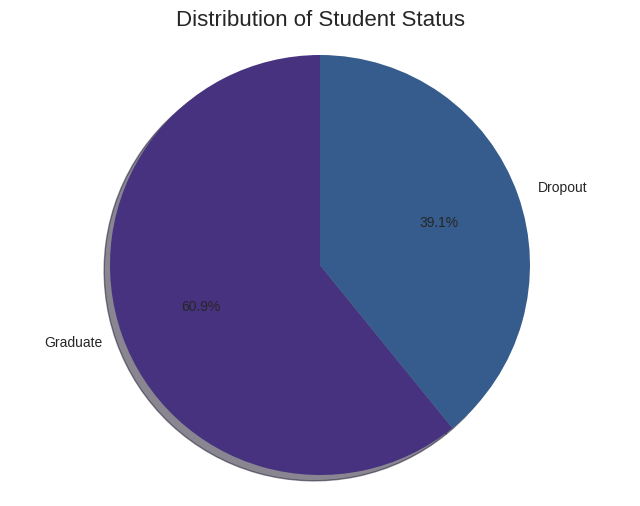

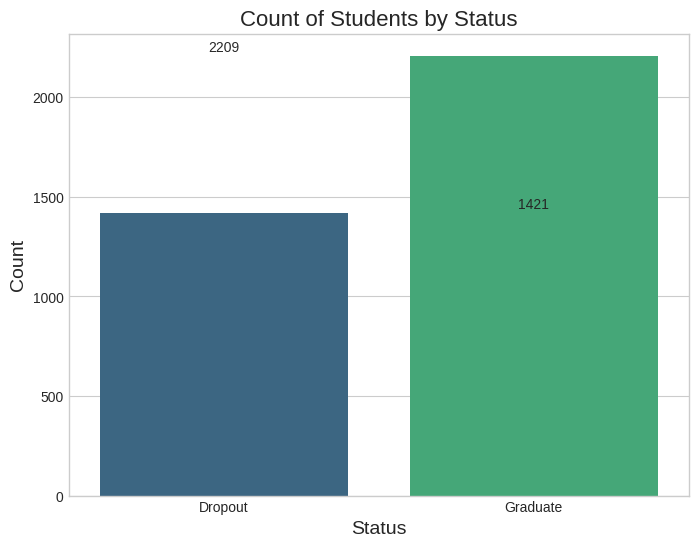

In [ ]:
# Pie chart of target variable
plt.figure(figsize=(8, 6))
status_counts = df['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of Student Status')
plt.axis('equal')
plt.show()

# Bar chart of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df, palette='viridis')
plt.title('Count of Students by Status')
plt.xlabel('Status')
plt.ylabel('Count')
for i, count in enumerate(status_counts):
    plt.text(i, count + 20, f"{count}", ha='center')
plt.show()

## 2. Exploratory Data Analysis (EDA)

### 2.1 Demographic Analysis

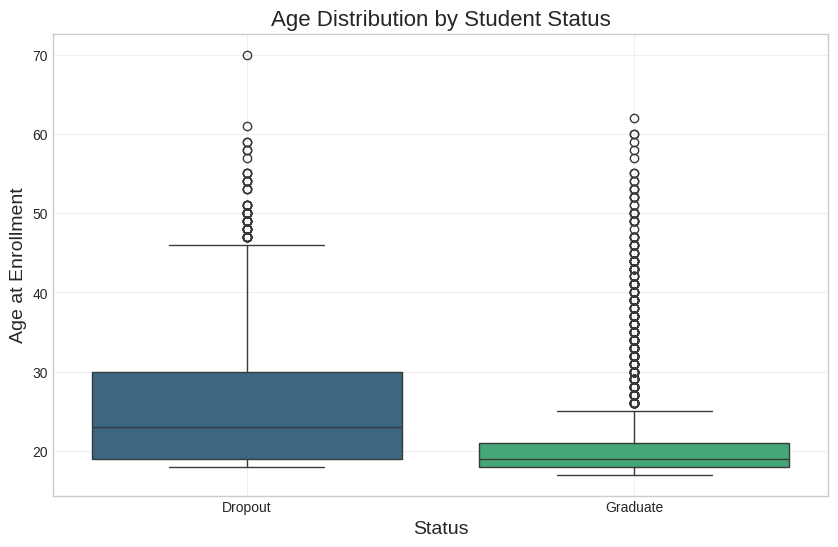

In [ ]:
# Age distribution by status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Age_at_enrollment', data=df, palette='viridis')
plt.title('Age Distribution by Student Status')
plt.xlabel('Status')
plt.ylabel('Age at Enrollment')
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1000x600 with 0 Axes>

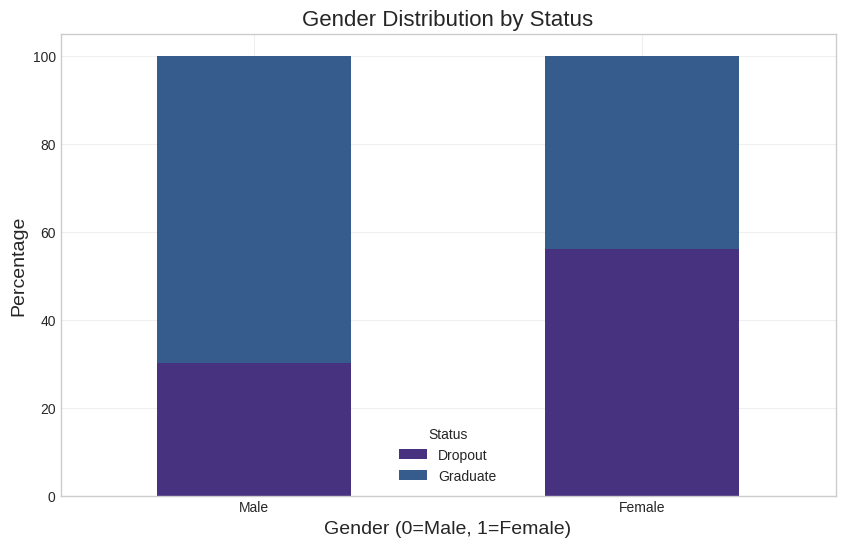

In [ ]:
# Gender distribution by status
plt.figure(figsize=(10, 6))
gender_status = pd.crosstab(df['Gender'], df['Status'], normalize='index') * 100
gender_status.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Status')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.legend(title='Status')
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1200x600 with 0 Axes>

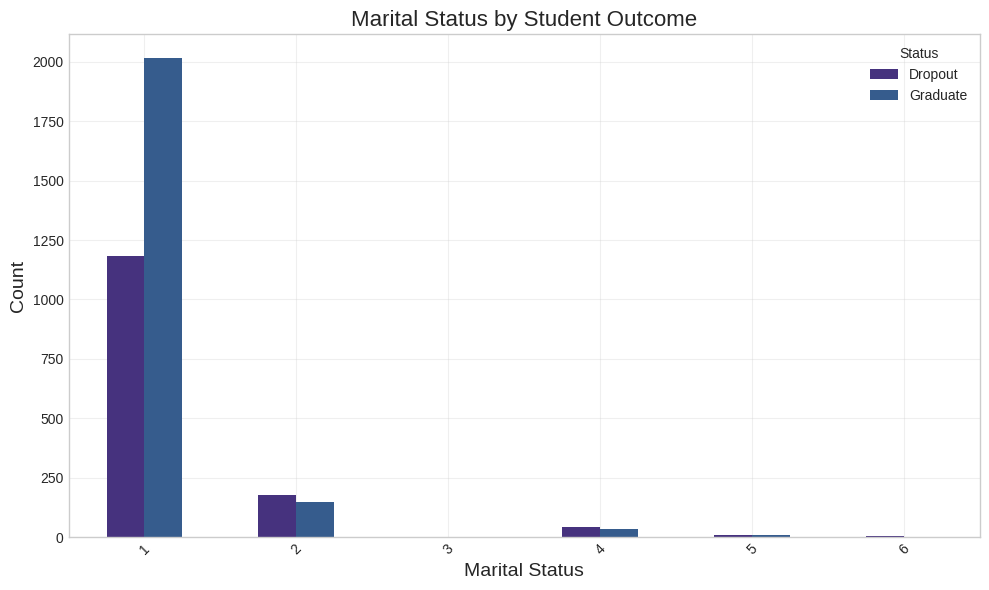

In [ ]:
# Marital status by dropout
plt.figure(figsize=(12, 6))
marital_counts = pd.crosstab(df['Marital_status'], df['Status'])
marital_counts.plot(kind='bar')
plt.title('Marital Status by Student Outcome')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2.2 Socioeconomic Factors

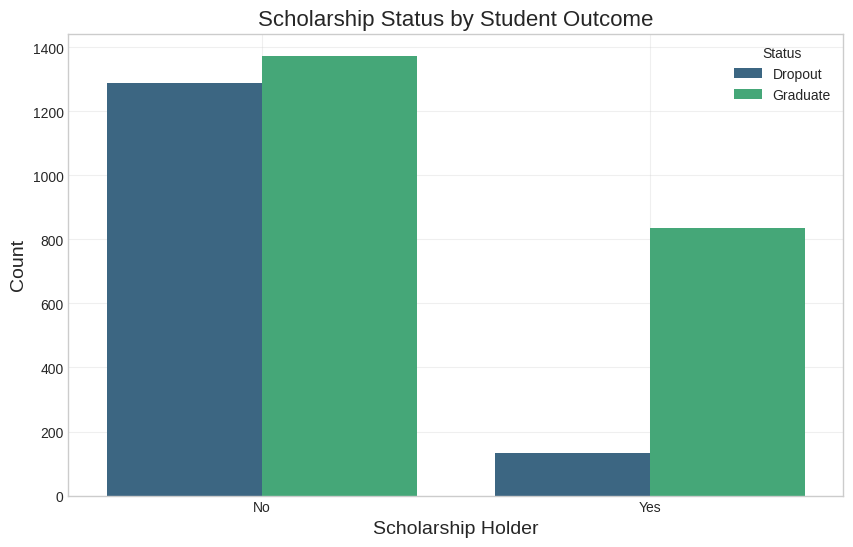

In [ ]:
# Economic factors: scholarship holder vs status
plt.figure(figsize=(10, 6))
sns.countplot(x='Scholarship_holder', hue='Status', data=df, palette='viridis')
plt.title('Scholarship Status by Student Outcome')
plt.xlabel('Scholarship Holder')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.grid(True, alpha=0.3)
plt.legend(title='Status')
plt.show()

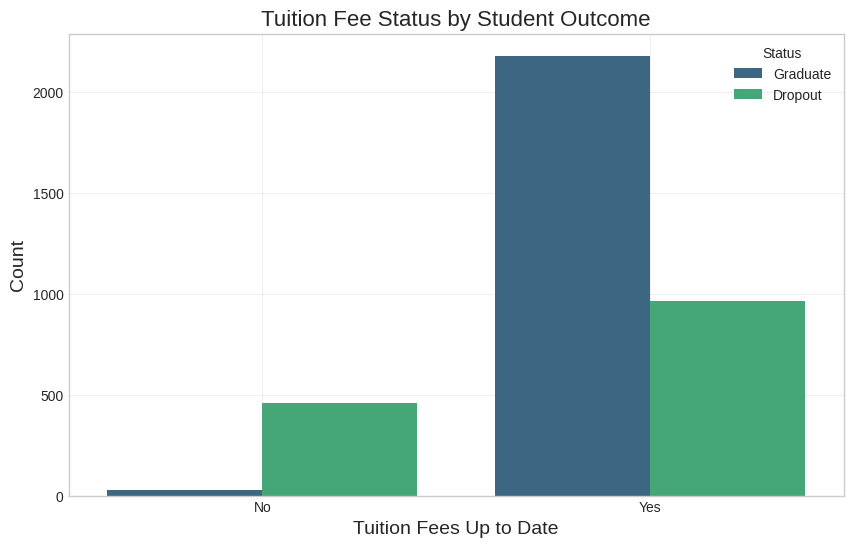

In [ ]:
# Economic factors: tuition fees
plt.figure(figsize=(10, 6))
sns.countplot(x='Tuition_fees_up_to_date', hue='Status', data=df, palette='viridis')
plt.title('Tuition Fee Status by Student Outcome')
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.grid(True, alpha=0.3)
plt.legend(title='Status')
plt.show()

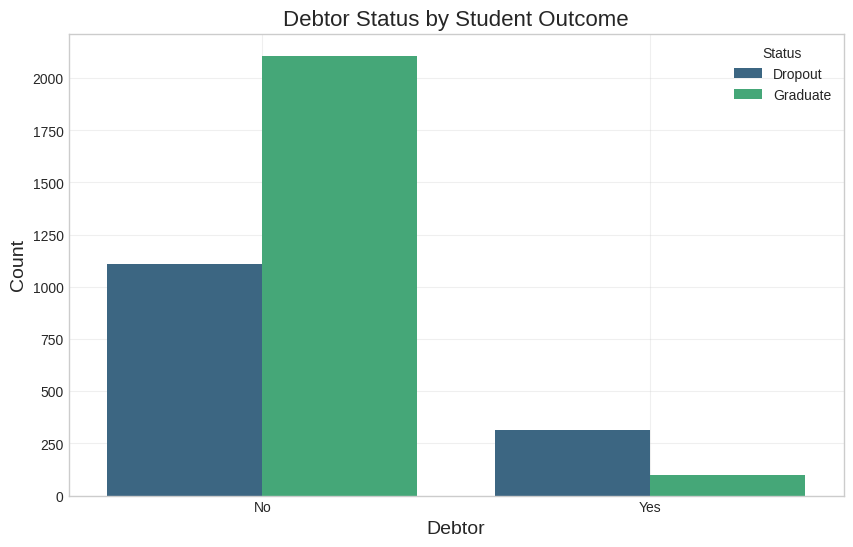

In [ ]:
# Debtor status
plt.figure(figsize=(10, 6))
sns.countplot(x='Debtor', hue='Status', data=df, palette='viridis')
plt.title('Debtor Status by Student Outcome')
plt.xlabel('Debtor')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.grid(True, alpha=0.3)
plt.legend(title='Status')
plt.show()

### 2.3 Educational Background

<Figure size 1200x800 with 0 Axes>

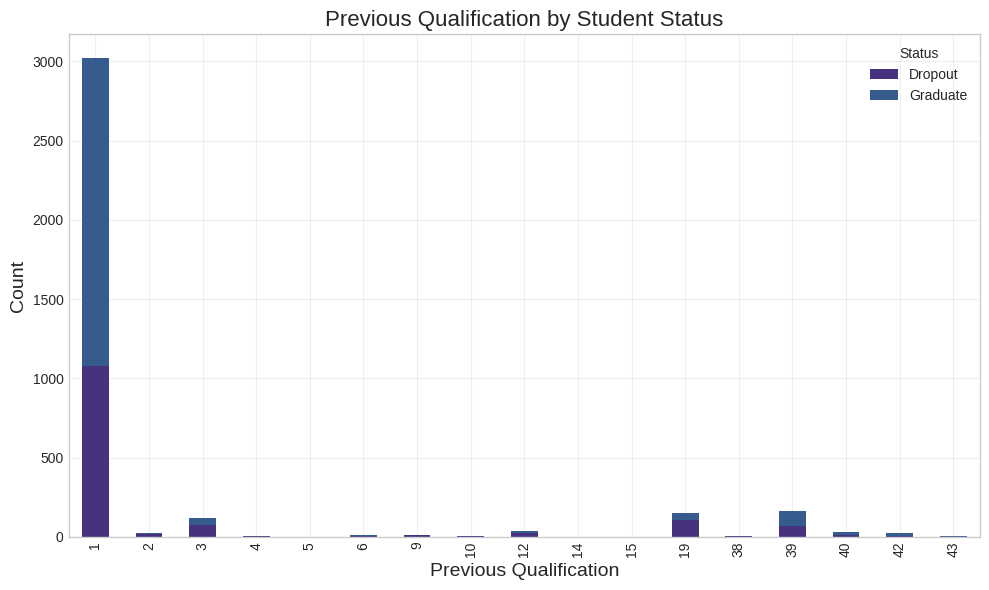

In [ ]:
# Educational background by status
plt.figure(figsize=(12, 8))
qualification_counts = pd.crosstab(df['Previous_qualification'], df['Status'])
qualification_counts.plot(kind='bar', stacked=True)
plt.title('Previous Qualification by Student Status')
plt.xlabel('Previous Qualification')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

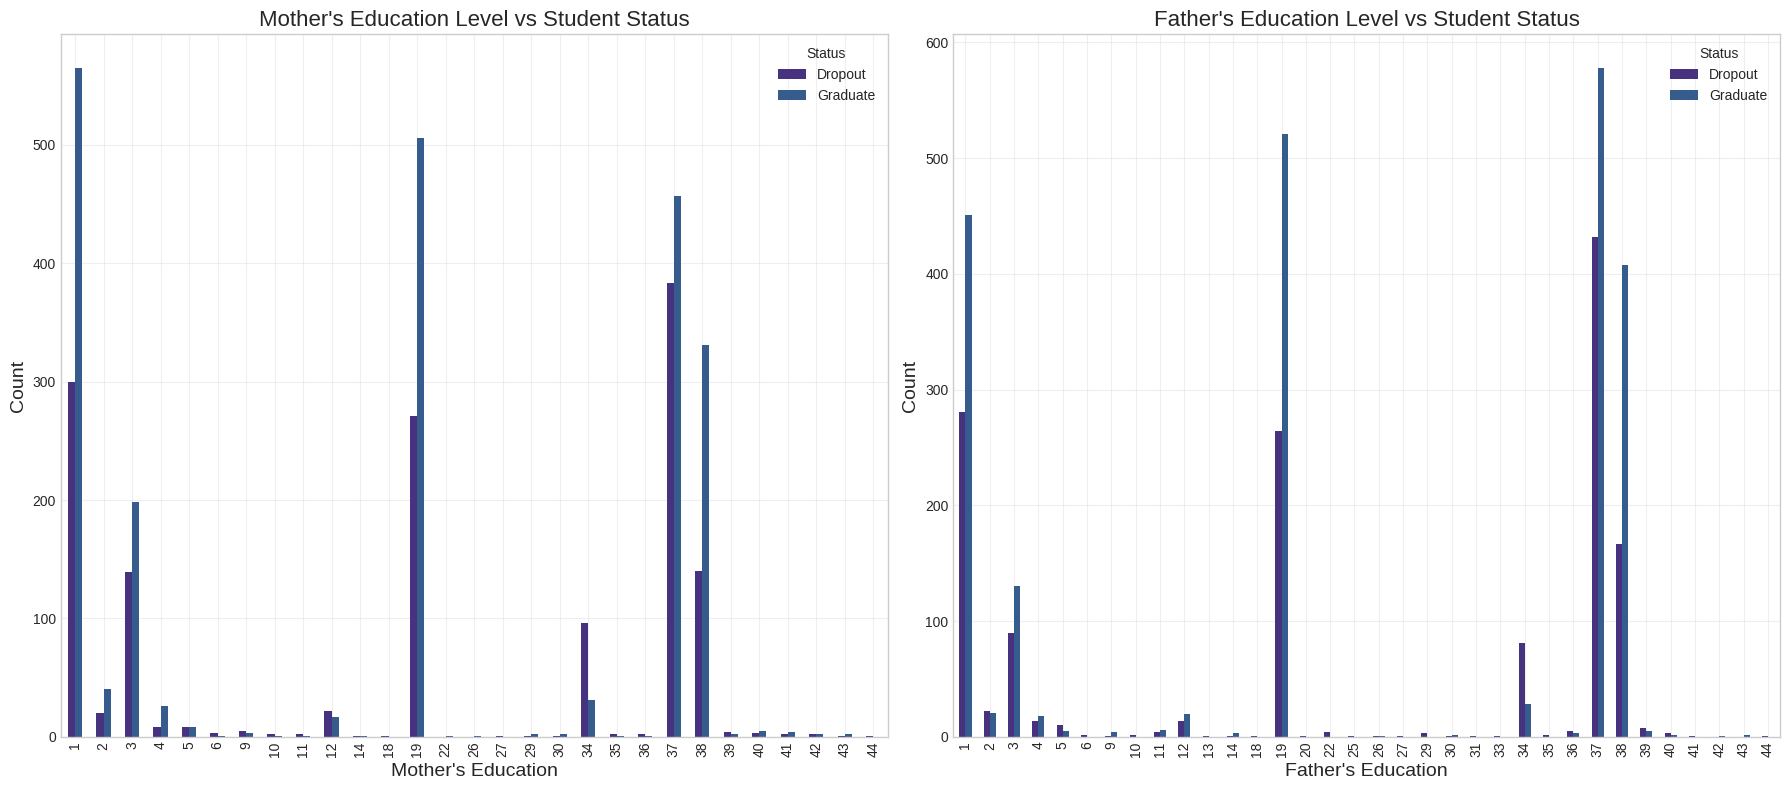

In [ ]:
# Parents' education level
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Mother's education
pd.crosstab(df['Mothers_qualification'], df['Status']).plot(kind='bar', ax=axes[0])
axes[0].set_title("Mother's Education Level vs Student Status")
axes[0].set_xlabel("Mother's Education")
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(True, alpha=0.3)

# Father's education
pd.crosstab(df['Fathers_qualification'], df['Status']).plot(kind='bar', ax=axes[1])
axes[1].set_title("Father's Education Level vs Student Status")
axes[1].set_xlabel("Father's Education")
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.4 Academic Performance

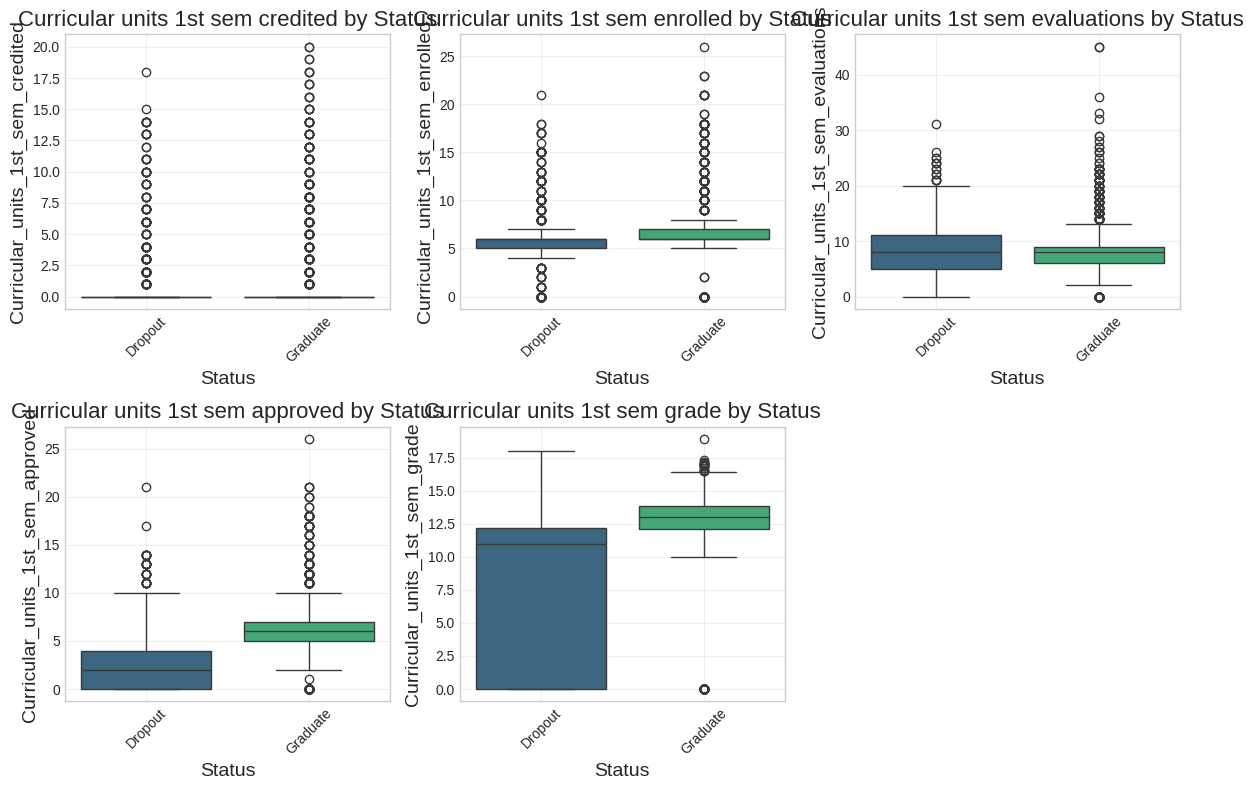

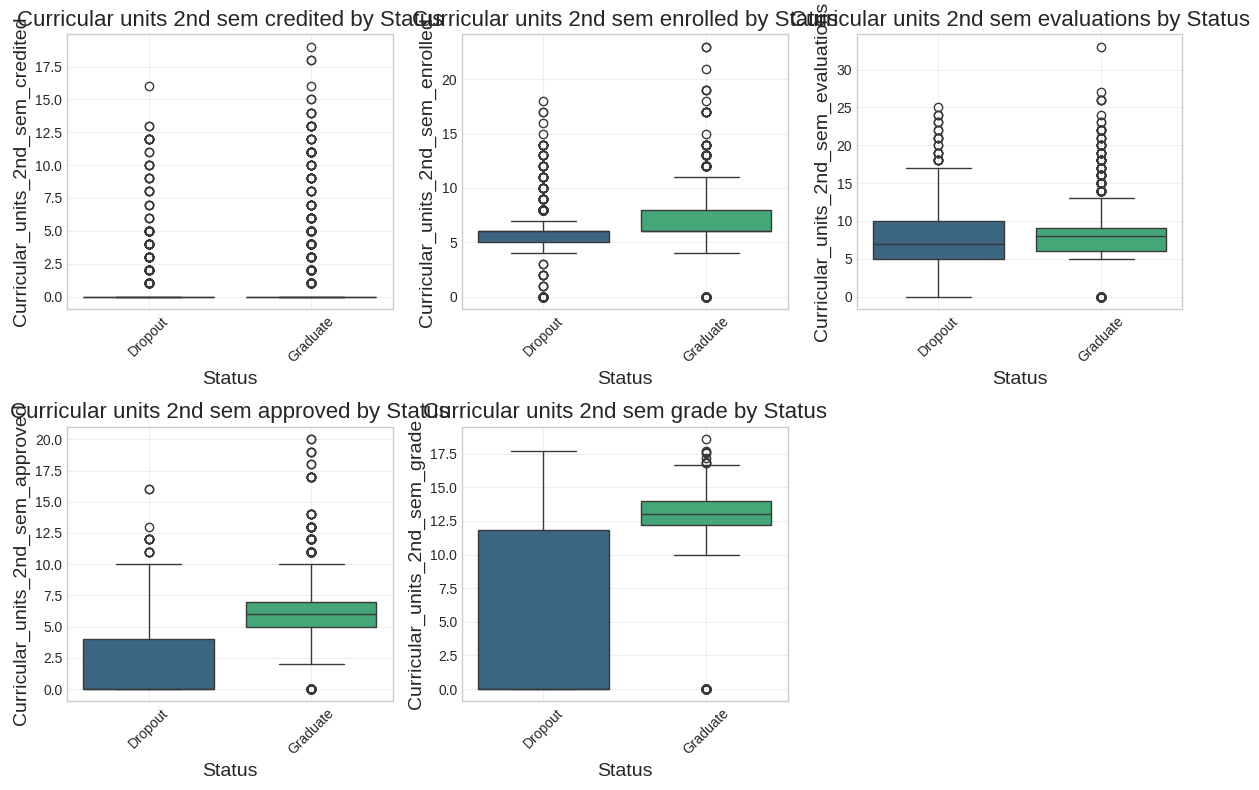

In [ ]:
# First semester performance
plt.figure(figsize=(12, 8))
academic_cols = ['Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
                'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
                'Curricular_units_1st_sem_grade']

for i, col in enumerate(academic_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Status', y=col, data=df, palette='viridis')
    plt.title(f'{col.replace("_", " ")} by Status')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Second semester performance
plt.figure(figsize=(12, 8))
academic_cols = ['Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled',
                'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved',
                'Curricular_units_2nd_sem_grade']

for i, col in enumerate(academic_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Status', y=col, data=df, palette='viridis')
    plt.title(f'{col.replace("_", " ")} by Status')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.5 Correlation Analysis

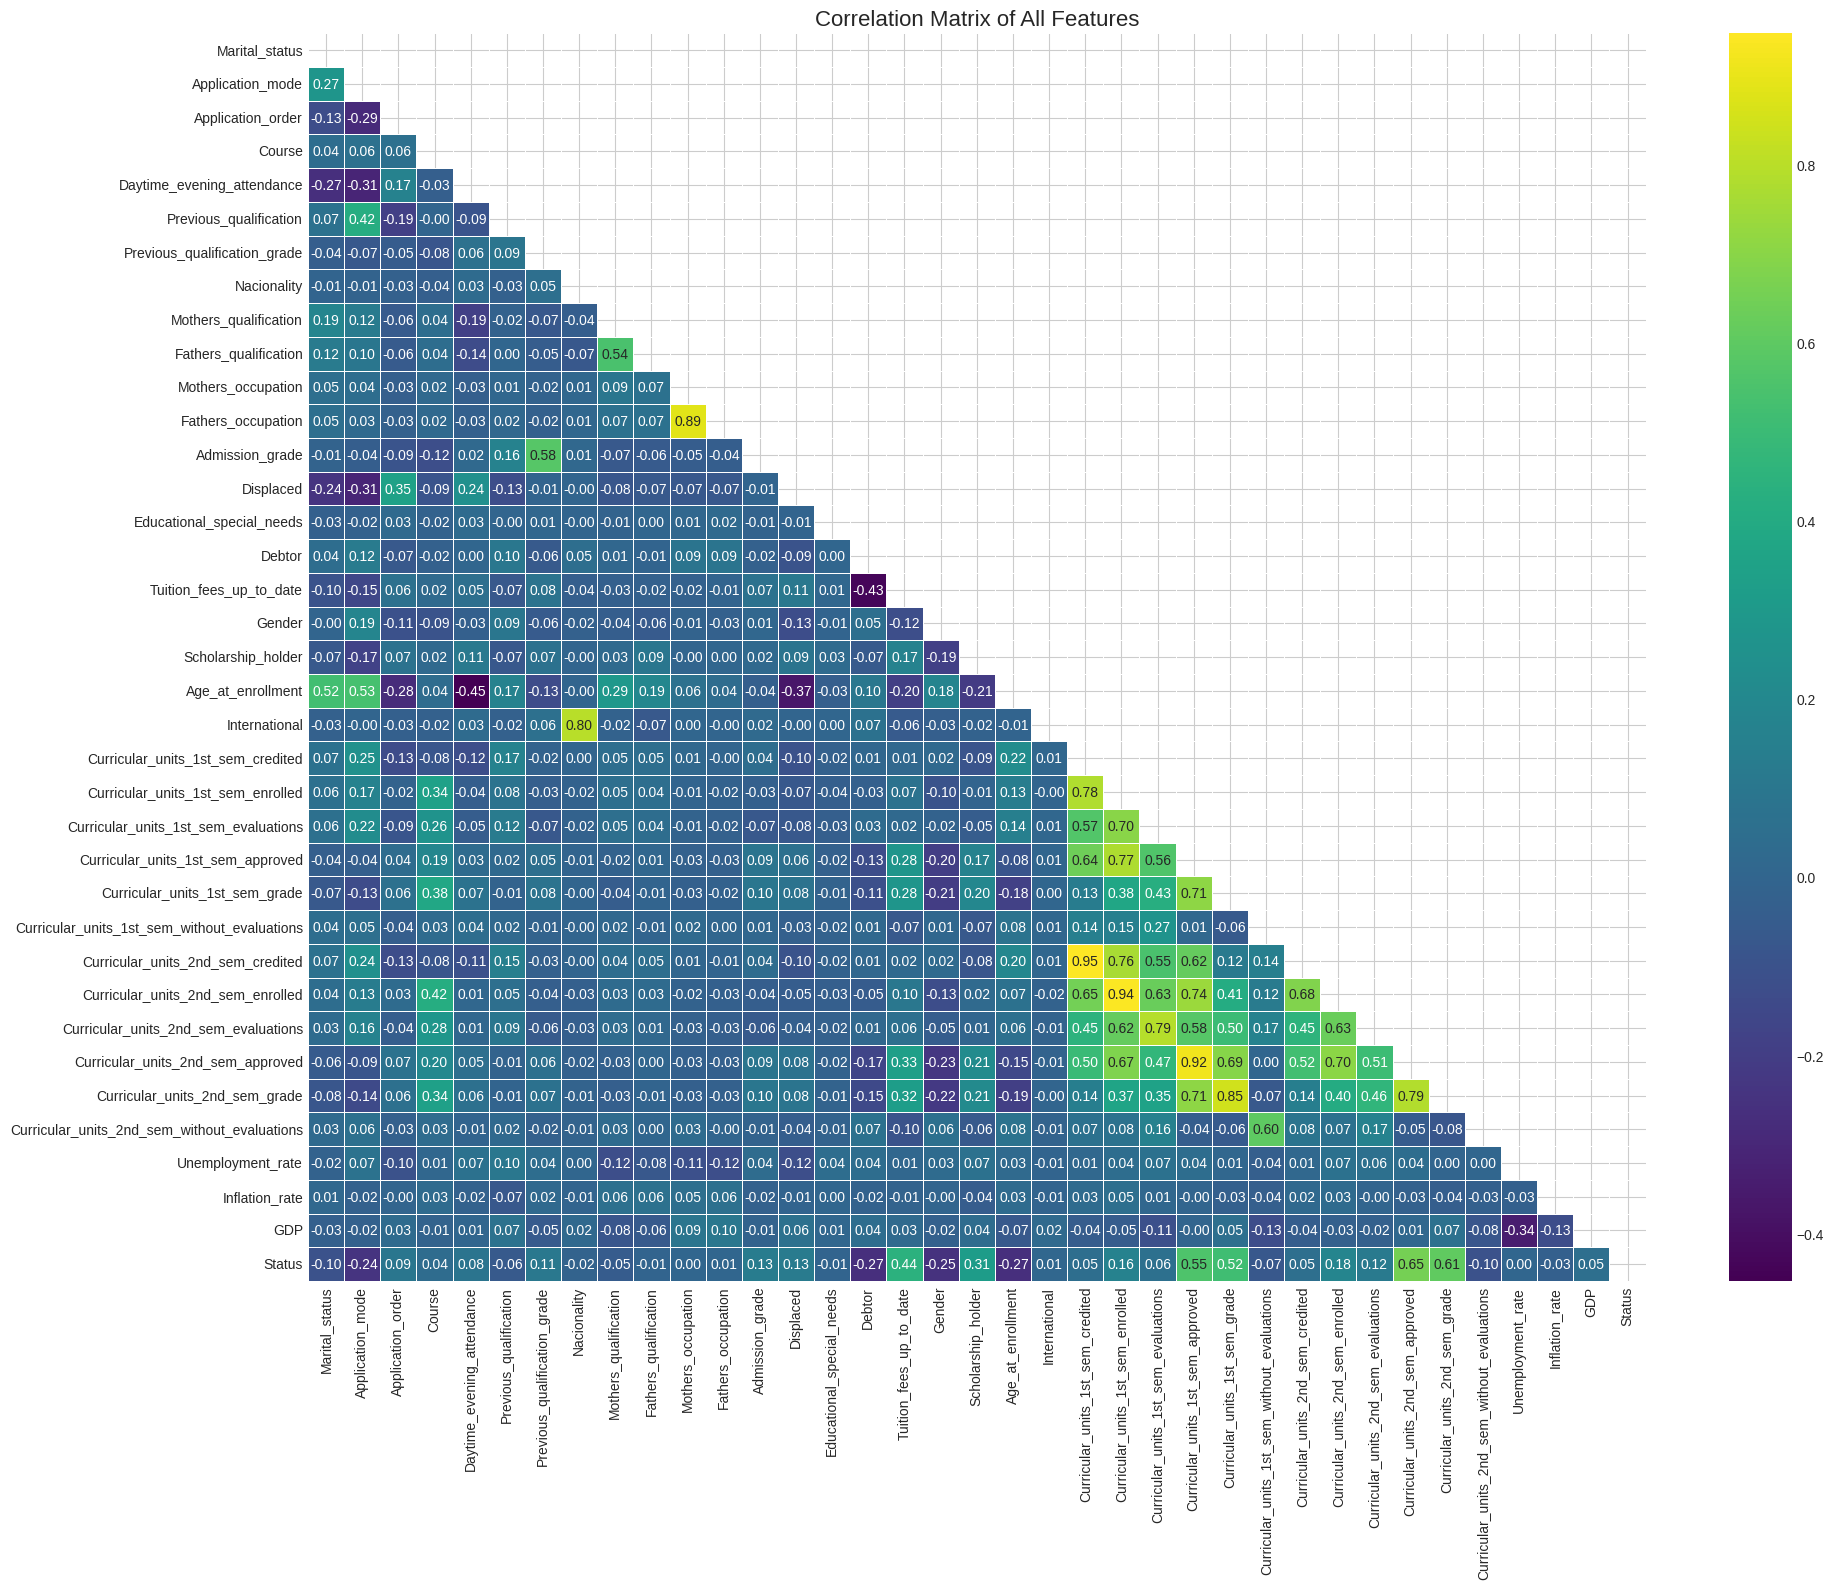

In [ ]:
# Convert categorical variables to numeric for correlation analysis
df_numeric = df.copy()

# Convert Status to numeric (Dropout=0, Graduate=1)
df_numeric['Status'] = df_numeric['Status'].map({'Dropout': 0, 'Graduate': 1})

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Plot correlation matrix
plt.figure(figsize=(20, 16))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis',
            linewidths=0.5, mask=mask)
plt.title('Correlation Matrix of All Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Correlation with Target Variable (Status):
Status                                          1.000000
Curricular_units_2nd_sem_approved               0.653995
Curricular_units_2nd_sem_grade                  0.605350
Curricular_units_1st_sem_approved               0.554881
Curricular_units_1st_sem_grade                  0.519927
Tuition_fees_up_to_date                         0.442138
Scholarship_holder                              0.313018
Curricular_units_2nd_sem_enrolled               0.182897
Curricular_units_1st_sem_enrolled               0.161074
Admission_grade                                 0.128058
Displaced                                       0.126113
Curricular_units_2nd_sem_evaluations            0.119239
Previous_qualification_grade                    0.109464
Application_order                               0.094355
Daytime_evening_attendance                      0.084496
Curricular_units_1st_sem_evaluations            0.059786
Curricular_units_2nd_sem_credited           

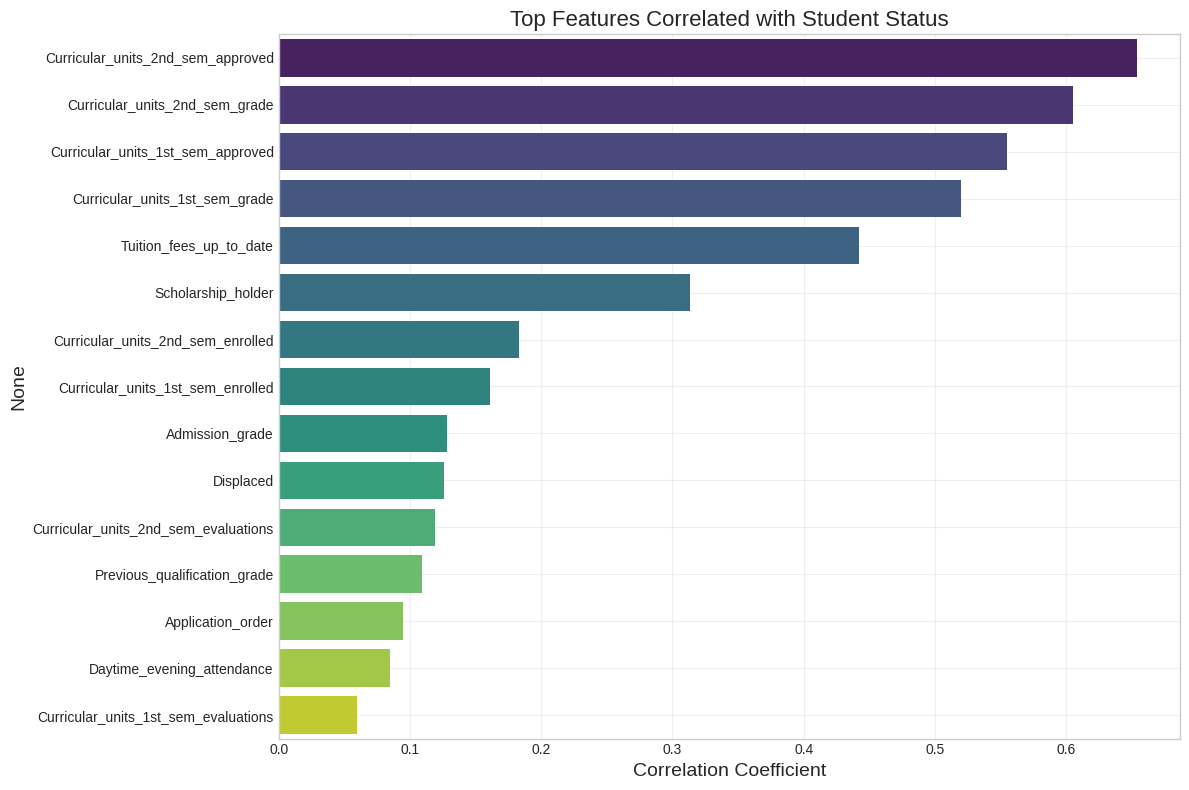

In [ ]:

# Show correlation with target variable
correlation_with_target = correlation_matrix['Status'].sort_values(ascending=False)
print("\nCorrelation with Target Variable (Status):")
print(correlation_with_target)

# Plot top correlated features with target
plt.figure(figsize=(12, 8))
top_corr = correlation_with_target.iloc[1:16]  # Skip Status itself
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title('Top Features Correlated with Student Status')
plt.xlabel('Correlation Coefficient')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Feature Engineering and Data Preprocessing

### 3.1 Create new features

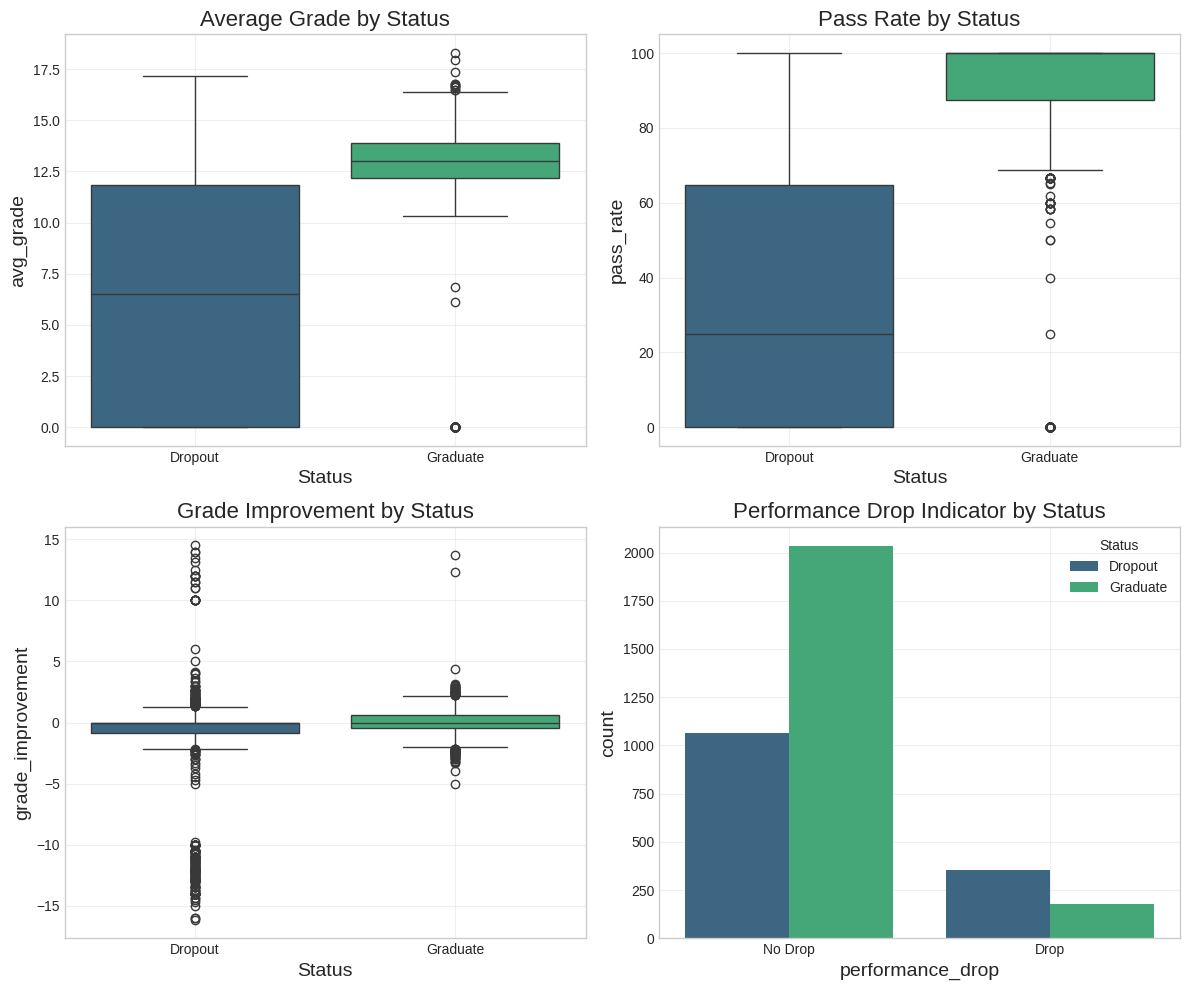

In [ ]:

# Create a copy of the original dataframe
df_processed = df.copy()

# Create new features
# Average grade across semesters
df_processed['avg_grade'] = (df_processed['Curricular_units_1st_sem_grade'] +
                            df_processed['Curricular_units_2nd_sem_grade']) / 2

# Total approved units
df_processed['total_approved_units'] = (df_processed['Curricular_units_1st_sem_approved'] +
                                      df_processed['Curricular_units_2nd_sem_approved'])

# Total enrolled units
df_processed['total_enrolled_units'] = (df_processed['Curricular_units_1st_sem_enrolled'] +
                                      df_processed['Curricular_units_2nd_sem_enrolled'])

# Pass rate (percentage of approved units out of enrolled)
df_processed['pass_rate'] = (df_processed['total_approved_units'] /
                           df_processed['total_enrolled_units']) * 100
df_processed['pass_rate'].fillna(0, inplace=True)

# Grade improvement from 1st to 2nd semester
df_processed['grade_improvement'] = (df_processed['Curricular_units_2nd_sem_grade'] -
                                   df_processed['Curricular_units_1st_sem_grade'])

# Performance drop indicator
df_processed['performance_drop'] = ((df_processed['Curricular_units_2nd_sem_approved'] <
                                  df_processed['Curricular_units_1st_sem_approved']) &
                                 (df_processed['Curricular_units_2nd_sem_grade'] <
                                  df_processed['Curricular_units_1st_sem_grade'])).astype(int)

# Calculate enrollment-to-approval ratio
df_processed['approval_rate_1st_sem'] = df_processed['Curricular_units_1st_sem_approved'] / df_processed['Curricular_units_1st_sem_enrolled']
df_processed['approval_rate_2nd_sem'] = df_processed['Curricular_units_2nd_sem_approved'] / df_processed['Curricular_units_2nd_sem_enrolled']
df_processed['approval_rate_1st_sem'].fillna(0, inplace=True)
df_processed['approval_rate_2nd_sem'].fillna(0, inplace=True)

# Convert categorical variables to string types for better handling
categorical_features = ['Gender', 'Scholarship_holder', 'Debtor', 'Tuition_fees_up_to_date',
                        'Displaced', 'Daytime_evening_attendance']

for feature in categorical_features:
    df_processed[feature] = df_processed[feature].astype(str).replace({'0': 'No', '1': 'Yes'})

df_processed['Daytime_evening_attendance'] = df_processed['Daytime_evening_attendance'].replace({'No': 'Evening', 'Yes': 'Daytime'})
df_processed['Gender'] = df_processed['Gender'].replace({'No': 'Male', 'Yes': 'Female'})

# Visualize new features
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Status', y='avg_grade', data=df_processed, palette='viridis')
plt.title('Average Grade by Status')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
sns.boxplot(x='Status', y='pass_rate', data=df_processed, palette='viridis')
plt.title('Pass Rate by Status')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
sns.boxplot(x='Status', y='grade_improvement', data=df_processed, palette='viridis')
plt.title('Grade Improvement by Status')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
sns.countplot(x='performance_drop', hue='Status', data=df_processed, palette='viridis')
plt.title('Performance Drop Indicator by Status')
plt.xticks([0, 1], ['No Drop', 'Drop'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.2 Feature Selection

In [ ]:
# Select features based on correlation analysis and domain knowledge
selected_features = [
    # Academic performance features (highest correlation with target)
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_credited', 'Curricular_units_2nd_sem_credited',
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_2nd_sem_enrolled',

    # Newly created features
    'avg_grade', 'total_approved_units', 'pass_rate', 'grade_improvement',
    'performance_drop', 'approval_rate_1st_sem', 'approval_rate_2nd_sem',

    # Important demographic features
    'Gender', 'Scholarship_holder', 'Debtor', 'Tuition_fees_up_to_date',
    'Displaced', 'Daytime_evening_attendance',

    # Admission features
    'Admission_grade', 'Previous_qualification_grade'
]

# Verify the selected features exist in the DataFrame
for feature in selected_features:
    if feature not in df_processed.columns:
        print(f"Warning: {feature} not found in the DataFrame")

# Create a new DataFrame with selected features
df_selected = df_processed[selected_features + ['Status']]

# Verify the shape of the new DataFrame
print(f"Shape of the selected features DataFrame: {df_selected.shape}")
print(f"Number of selected features: {len(selected_features)}")

Shape of the selected features DataFrame: (3630, 24)
Number of selected features: 23


### 3.3 Encoding and Scaling

In [ ]:
# Save directory for models and encoders
if not os.path.exists("model"):
    os.makedirs("model")

# Identify categorical and numerical features
categorical_features = ['Gender', 'Scholarship_holder', 'Debtor', 'Tuition_fees_up_to_date',
                        'Displaced', 'Daytime_evening_attendance']
numerical_features = [col for col in selected_features if col not in categorical_features]

# Convert target variable to numeric (0 for Dropout, 1 for Graduate)
df_selected['Status'] = df_selected['Status'].map({'Dropout': 0, 'Graduate': 1})

# Encode categorical features using Label Encoder
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df_selected[feature] = le.fit_transform(df_selected[feature])
    label_encoders[feature] = le
    # Save the encoder
    joblib.dump(le, f"model/encoder_{feature}.joblib")

# Scale numerical features
scaler = StandardScaler()
df_selected[numerical_features] = scaler.fit_transform(df_selected[numerical_features])
# Save the scaler
joblib.dump(scaler, "model/scaler_numerical_features.joblib")

# Check the processed DataFrame
print(df_selected.head())

   Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
0                          -1.480034                       -2.083224   
1                           0.373306                        0.685217   
2                          -1.480034                       -2.083224   
3                           0.373306                        0.572219   
4                           0.064416                        0.355641   

   Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0                          -1.429014                       -1.831085   
1                           0.468555                        0.662383   
2                          -1.429014                       -1.831085   
3                           0.152293                        0.431281   
4                           0.468555                        0.540750   

   Curricular_units_1st_sem_credited  Curricular_units_2nd_sem_credited  \
0                          -0.304517                       

## 4. Model Training and Evaluation

Training set shape: (2904, 23)
Testing set shape: (726, 23)

Evaluating Logistic Regression...
Logistic Regression CV Accuracy: 0.9053
Logistic Regression Test Accuracy: 0.9118
Logistic Regression Test F1 Score: 0.9297

Evaluating Decision Tree...
Decision Tree CV Accuracy: 0.8499
Decision Tree Test Accuracy: 0.8526
Decision Tree Test F1 Score: 0.8780

Evaluating Random Forest...
Random Forest CV Accuracy: 0.9043
Random Forest Test Accuracy: 0.9132
Random Forest Test F1 Score: 0.9310

Evaluating Gradient Boosting...
Gradient Boosting CV Accuracy: 0.9056
Gradient Boosting Test Accuracy: 0.9160
Gradient Boosting Test F1 Score: 0.9329

Evaluating XGBoost...
XGBoost CV Accuracy: 0.9005
XGBoost Test Accuracy: 0.9187
XGBoost Test F1 Score: 0.9355

Evaluating LightGBM...
[LightGBM] [Info] Number of positive: 1413, number of negative: 910
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_row_wise=true` to remove the overh

<Figure size 1200x800 with 0 Axes>

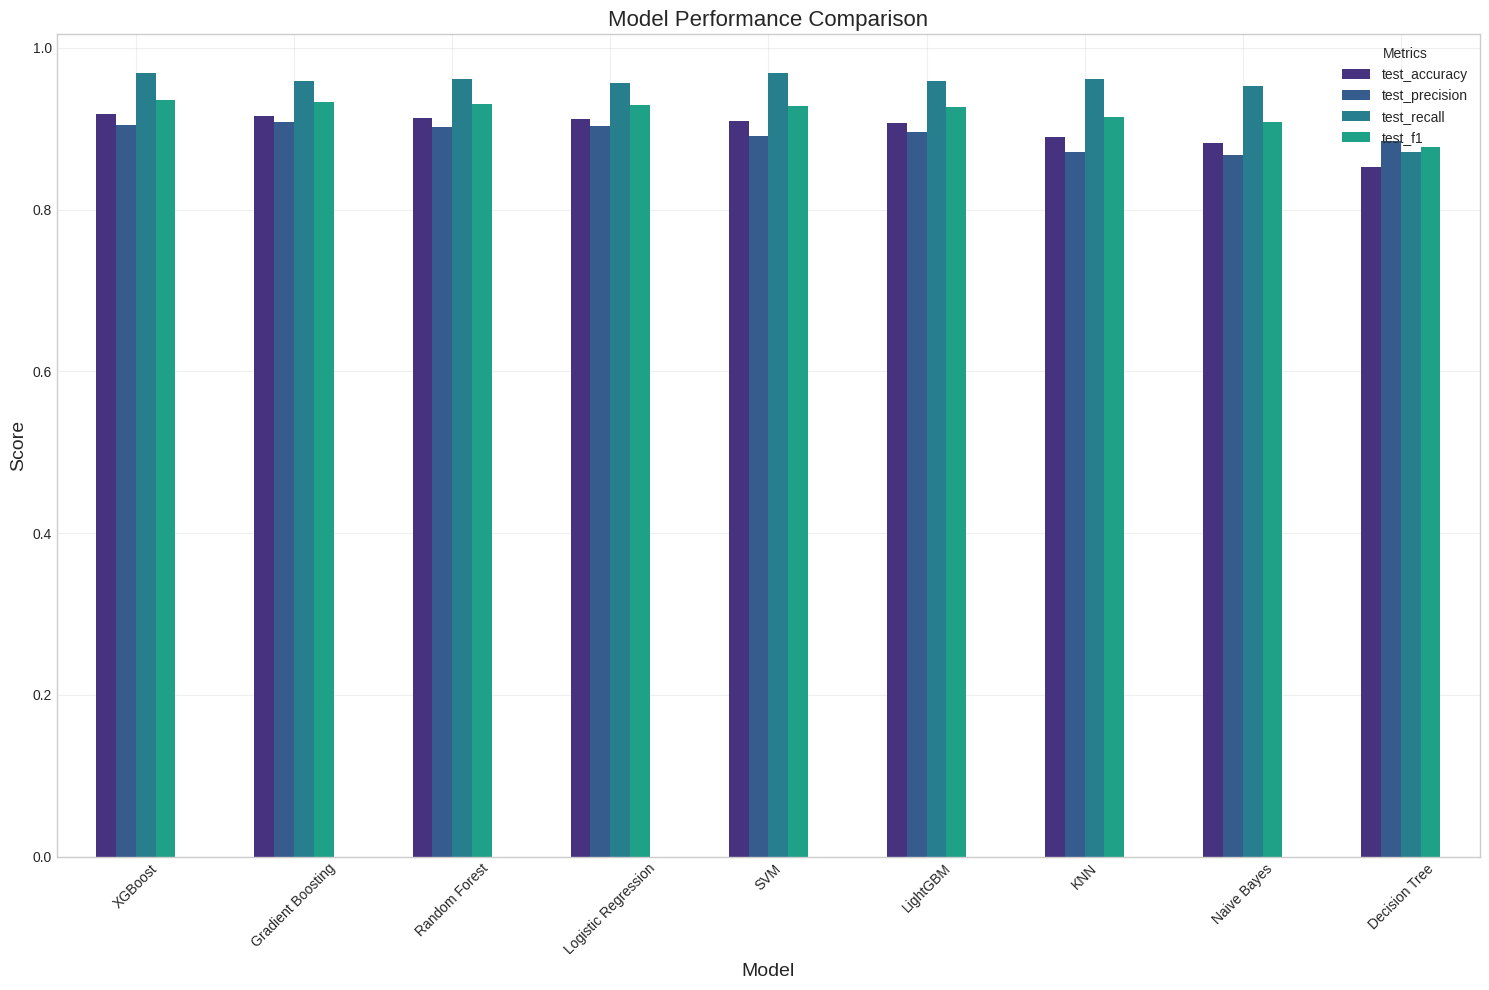

In [ ]:
# Split the data into features and target
X = df_selected.drop('Status', axis=1).values
y = df_selected['Status'].values

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model
results = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")

    # Perform cross-validation
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)

    # Store the results
    results[name] = {
        'cv_accuracy': cv_results['test_accuracy'].mean(),
        'cv_precision': cv_results['test_precision'].mean(),
        'cv_recall': cv_results['test_recall'].mean(),
        'cv_f1': cv_results['test_f1'].mean(),
        'cv_roc_auc': cv_results['test_roc_auc'].mean()
    }

    # Fit the model on the entire training set
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate test metrics
    results[name]['test_accuracy'] = accuracy_score(y_test, y_pred)
    results[name]['test_precision'] = precision_score(y_test, y_pred)
    results[name]['test_recall'] = recall_score(y_test, y_pred)
    results[name]['test_f1'] = f1_score(y_test, y_pred)

    # Calculate ROC AUC if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        results[name]['test_roc_auc'] = roc_auc_score(y_test, y_prob)
    else:
        results[name]['test_roc_auc'] = 'N/A'

    print(f"{name} CV Accuracy: {results[name]['cv_accuracy']:.4f}")
    print(f"{name} Test Accuracy: {results[name]['test_accuracy']:.4f}")
    print(f"{name} Test F1 Score: {results[name]['test_f1']:.4f}")

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nModel Comparison (Cross-Validation Results):")
print(results_df[['cv_accuracy', 'cv_precision', 'cv_recall', 'cv_f1', 'cv_roc_auc']].sort_values(by='cv_f1', ascending=False))

print("\nModel Comparison (Test Results):")
print(results_df[['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']].sort_values(by='test_f1', ascending=False))

# Visualize model performance
plt.figure(figsize=(12, 8))
metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
results_df_plot = results_df[metrics].sort_values(by='test_f1', ascending=False)

results_df_plot.plot(kind='bar', figsize=(15, 10))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


### 4.1 Hyperparameter Tuning for the Best Models

In [ ]:
# Based on the results, let's pick the top 3 models for hyperparameter tuning

# 1. Random Forest Hyperparameter Tuning
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

rf_grid_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=20,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

print("Starting Random Forest hyperparameter tuning...")
rf_grid_search.fit(X_train, y_train)

print(f"Best parameters: {rf_grid_search.best_params_}")
print(f"Best cross-validation score: {rf_grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_rf = rf_grid_search.best_estimator_
rf_y_pred = best_rf.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_y_pred)
rf_test_f1 = f1_score(y_test, rf_y_pred)

print(f"Test accuracy: {rf_test_accuracy:.4f}")
print(f"Test F1 score: {rf_test_f1:.4f}")

Starting Random Forest hyperparameter tuning...
Best parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}
Best cross-validation score: 0.9238
Test accuracy: 0.9091
Test F1 score: 0.9276


In [ ]:
# 2. Gradient Boosting Hyperparameter Tuning
gb_model = GradientBoostingClassifier(random_state=42)
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

gb_grid_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_param_grid,
    n_iter=20,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

print("\nStarting Gradient Boosting hyperparameter tuning...")
gb_grid_search.fit(X_train, y_train)

print(f"Best parameters: {gb_grid_search.best_params_}")
print(f"Best cross-validation score: {gb_grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_gb = gb_grid_search.best_estimator_
gb_y_pred = best_gb.predict(X_test)
gb_test_accuracy = accuracy_score(y_test, gb_y_pred)
gb_test_f1 = f1_score(y_test, gb_y_pred)

print(f"Test accuracy: {gb_test_accuracy:.4f}")
print(f"Test F1 score: {gb_test_f1:.4f}")



Starting Gradient Boosting hyperparameter tuning...
Best parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 4, 'learning_rate': 0.05}
Best cross-validation score: 0.9243
Test accuracy: 0.9160
Test F1 score: 0.9333


In [ ]:
# 3. XGBoost Hyperparameter Tuning
xgb_model = XGBClassifier(random_state=42)
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 4, 6],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_grid_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=20,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

print("\nStarting XGBoost hyperparameter tuning...")
xgb_grid_search.fit(X_train, y_train)

print(f"Best parameters: {xgb_grid_search.best_params_}")
print(f"Best cross-validation score: {xgb_grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_xgb = xgb_grid_search.best_estimator_
xgb_y_pred = best_xgb.predict(X_test)
xgb_test_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_test_f1 = f1_score(y_test, xgb_y_pred)

print(f"Test accuracy: {xgb_test_accuracy:.4f}")
print(f"Test F1 score: {xgb_test_f1:.4f}")


Starting XGBoost hyperparameter tuning...
Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 6, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.9}
Best cross-validation score: 0.9253
Test accuracy: 0.9160
Test F1 score: 0.9335


### 4.2 Compare the Best Tuned Models

Best Tuned Models Comparison:
                   accuracy  precision    recall        f1   roc_auc
XGBoost            0.915978   0.901053  0.968326  0.933479  0.951230
Gradient Boosting  0.915978   0.902748  0.966063  0.933333  0.953245
Random Forest      0.909091   0.900000  0.957014  0.927632  0.953524


<Figure size 1200x800 with 0 Axes>

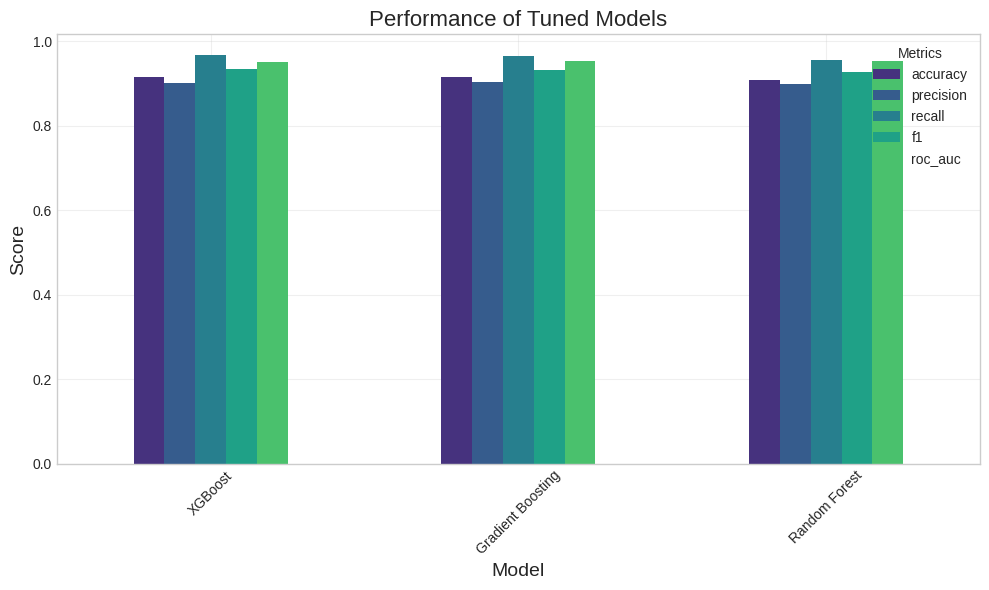

In [ ]:
# Collect the best models
best_models = {
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'XGBoost': best_xgb
}

# Evaluate and compare the best models
best_results = {}

for name, model in best_models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    best_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob)
    }

# Convert results to DataFrame
best_results_df = pd.DataFrame.from_dict(best_results, orient='index')
print("Best Tuned Models Comparison:")
print(best_results_df.sort_values(by='f1', ascending=False))

# Visualize the results
plt.figure(figsize=(12, 8))
best_results_df.sort_values(by='f1', ascending=False).plot(kind='bar')
plt.title('Performance of Tuned Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


### 4.3 Detailed Analysis of the Best Model

Best model: XGBoost


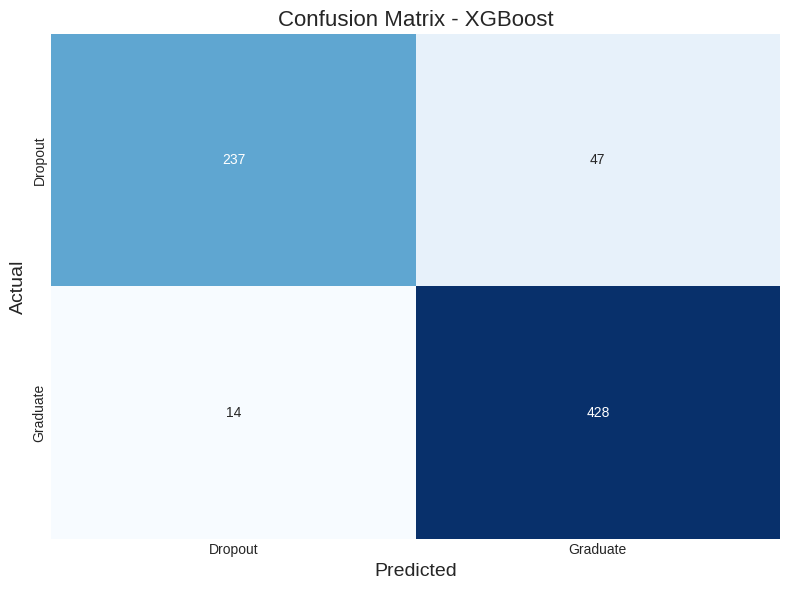


Classification Report:
              precision    recall  f1-score   support

     Dropout       0.94      0.83      0.89       284
    Graduate       0.90      0.97      0.93       442

    accuracy                           0.92       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.92      0.91       726



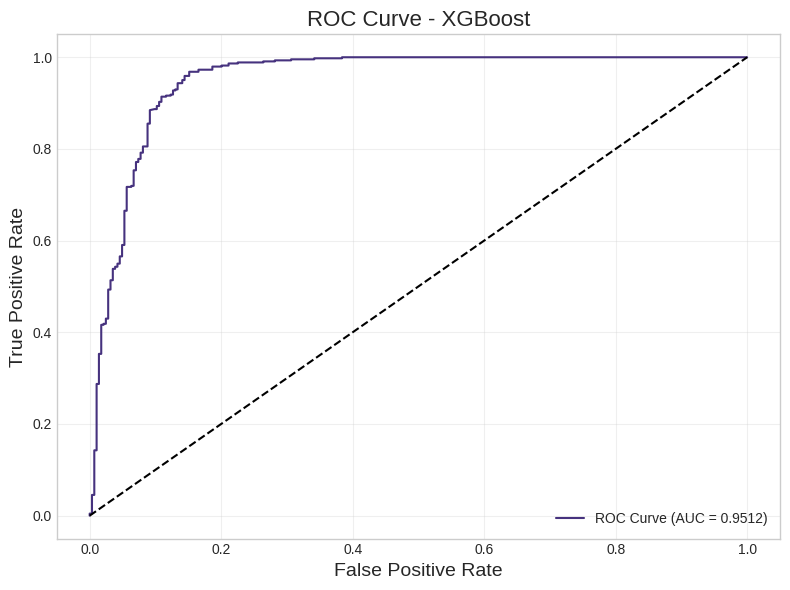

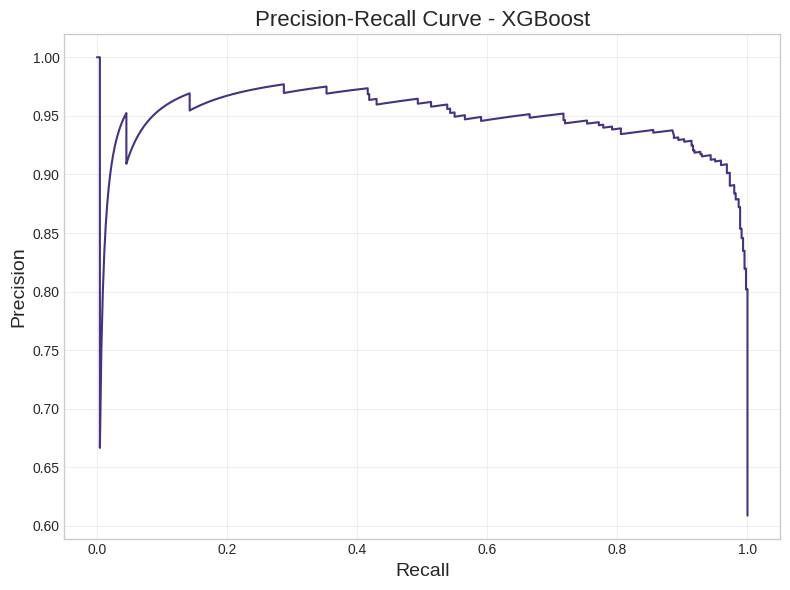

In [ ]:
# Select the best model based on F1 score
best_model_name = best_results_df.sort_values(by='f1', ascending=False).index[0]
best_model = best_models[best_model_name]

print(f"Best model: {best_model_name}")

# Make predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Dropout', 'Graduate'])
plt.yticks([0.5, 1.5], ['Dropout', 'Graduate'])
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate']))

# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve - {best_model_name}')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4.4 Feature Importance Analysis

Feature Importances:
                              Feature  Importance
10                          pass_rate    0.435851
14              approval_rate_2nd_sem    0.129954
18            Tuition_fees_up_to_date    0.058896
6   Curricular_units_1st_sem_enrolled    0.051427
9                total_approved_units    0.031863
17                             Debtor    0.030277
16                 Scholarship_holder    0.026073
7   Curricular_units_2nd_sem_enrolled    0.025391
2   Curricular_units_2nd_sem_approved    0.025150
20         Daytime_evening_attendance    0.021339
5   Curricular_units_2nd_sem_credited    0.016926
13              approval_rate_1st_sem    0.016470
4   Curricular_units_1st_sem_credited    0.016178
15                             Gender    0.013664
21                    Admission_grade    0.012526
0   Curricular_units_1st_sem_approved    0.012336
22       Previous_qualification_grade    0.011612
3      Curricular_units_2nd_sem_grade    0.011518
19                          D

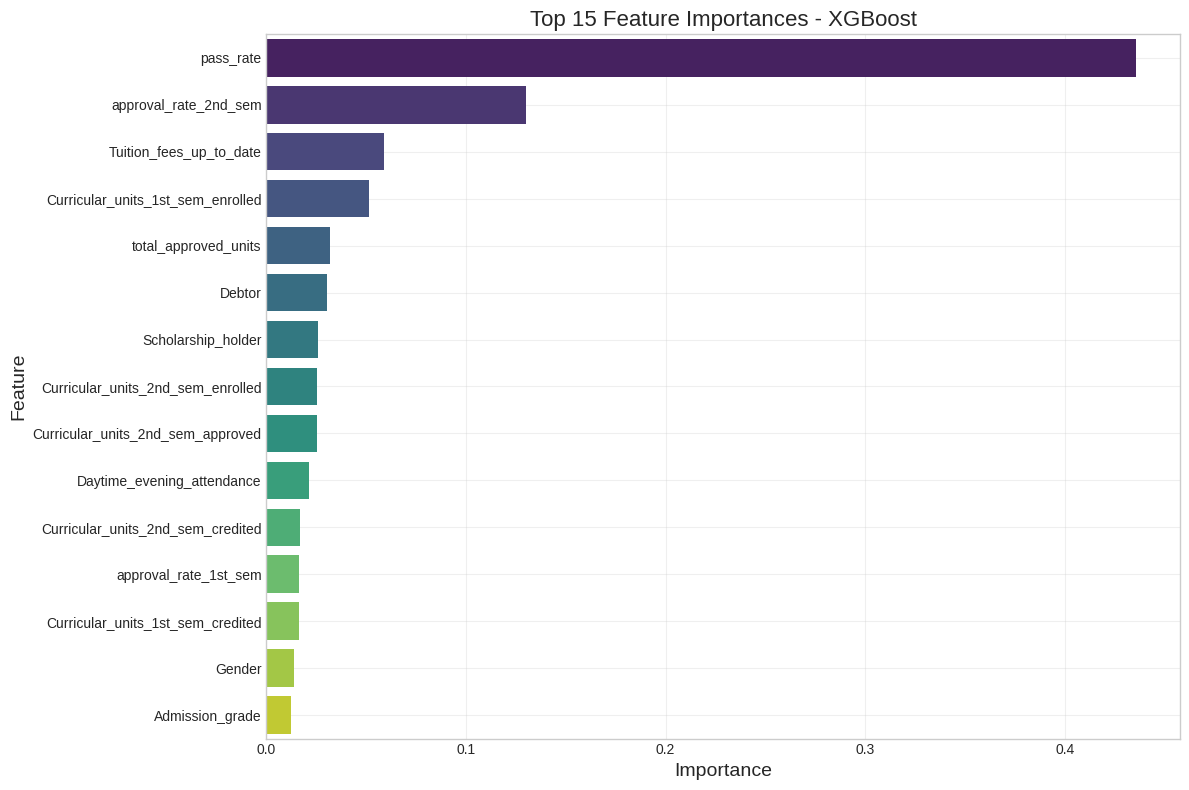

In [ ]:
# Check if the model has feature importance attributes
if hasattr(best_model, 'feature_importances_'):
    # Get feature importances
    feature_importances = best_model.feature_importances_

    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': df_selected.drop('Status', axis=1).columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Print the feature importances
    print("Feature Importances:")
    print(feature_importance_df)

    # Plot the feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
elif hasattr(best_model, 'coef_'):
    # For linear models like Logistic Regression
    feature_importances = np.abs(best_model.coef_[0])

    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': df_selected.drop('Status', axis=1).columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Print the feature importances
    print("Feature Importances (absolute coefficient values):")
    print(feature_importance_df)

    # Plot the feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.xlabel('|Coefficient|')
    plt.ylabel('Feature')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("This model doesn't provide feature importances.")

## 5. Model Deployment Preparation

In [ ]:
# Save the best model
best_model_filename = f'model/{best_model_name.replace(" ", "_")}_model.joblib'
joblib.dump(best_model, best_model_filename)
print(f"Best model saved as {best_model_filename}")

# Save the feature names
feature_names = df_selected.drop('Status', axis=1).columns.tolist()
joblib.dump(feature_names, 'model/feature_names.joblib')
print("Feature names saved")

# Save the processed dataset for reference
df_selected.to_csv('df_clean_processed.csv', index=False)
print("Processed dataset saved as df_clean_processed.csv")

Best model saved as model/XGBoost_model.joblib
Feature names saved
Processed dataset saved as df_clean_processed.csv


In [ ]:
!pip freeze > requirements.txt


In [ ]:
!python --version


Python 3.11.12
